In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter

In [2]:
data = pd.read_csv('data.csv',encoding = "ISO-8859-1")

#### Lets explore the data and see what we can do with numerical and categorical data we have

In [3]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Let's check for missing values

In [5]:
data.isna().any(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


(InvoiceNo      False
 StockCode      False
 Description     True
 Quantity       False
 InvoiceDate    False
 UnitPrice      False
 CustomerID      True
 Country        False
 dtype: bool,
 None)

In [6]:
data['Description'] = data['Description'].fillna('No Description')

Our analysis will be focused on purchases done with customer IDs

In [7]:
data = data.dropna(subset=['CustomerID'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


Let's change Date column to datetime

In [9]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

c:\users\aliaa ezz\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [11]:
data['CustomerID'] = data['CustomerID'].astype('object')

c:\users\aliaa ezz\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

checking for incorrect data quantities and remove them

In [13]:
data[data['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [14]:
data = data[data['Quantity']>0]

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  object        
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.3+ MB


In [16]:
data[data['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Also, we will execlude the free units

In [17]:
data = data[data['UnitPrice'] != 0]

In [18]:
data[data['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [19]:
data['InvoiceNo'].nunique()

18532

In [20]:
data['CustomerID'].nunique()

4338

In [21]:
data.shape

(397884, 8)

The countries found in this data

In [23]:
data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

Also, we will remove the data with no country

In [24]:
data.query('Country == "Unspecified"')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
152712,549687,20685,DOORMAT RED RETROSPOT,2,2011-04-11 13:29:00,7.95,12363,Unspecified
152713,549687,22691,DOORMAT WELCOME SUNRISE,2,2011-04-11 13:29:00,7.95,12363,Unspecified
152714,549687,48116,DOORMAT MULTICOLOUR STRIPE,2,2011-04-11 13:29:00,7.95,12363,Unspecified
152715,549687,21213,PACK OF 72 SKULL CAKE CASES,24,2011-04-11 13:29:00,0.55,12363,Unspecified
152716,549687,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2011-04-11 13:29:00,0.55,12363,Unspecified
...,...,...,...,...,...,...,...,...
308810,564051,23007,SPACEBOY BABY GIFT SET,1,2011-08-22 13:32:00,16.95,14265,Unspecified
308811,564051,21833,CAMOUFLAGE LED TORCH,12,2011-08-22 13:32:00,1.69,14265,Unspecified
308812,564051,23081,GREEN METAL BOX ARMY SUPPLIES,2,2011-08-22 13:32:00,8.25,14265,Unspecified
308813,564051,23046,PAPER LANTERN 9 POINT DELUXE STAR,2,2011-08-22 13:32:00,6.65,14265,Unspecified


In [25]:
data = data[data['Country'] != 'Unspecified']

In [26]:
data.shape

(397640, 8)

Now let's have a look at the data statistics after we only have the complete data.

In [27]:
data.describe()

,Quantity,UnitPrice
count,397640.000000,397640.000000
mean,12.991709,3.116436
std,179.386598,22.104501
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


### Some Question to Work This Data Out

- Which country contributed with the highest sales?
- Maximum Payment Customer is in which Country?
- Most popular purchase
- Orders timelines per year per Country?
- The most expensive country
- Customers not in United Kingdom with most purchases

Let's have a column with the total price for each purchase

In [28]:
data['totalPrice'] = data['UnitPrice'] * data['Quantity']

In [29]:
data[data['Quantity'] == data['Quantity'].max()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,totalPrice
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.6


In [30]:
data_Countries_Sales = data.groupby('Country').sum().sort_values('totalPrice',ascending = False)

In [31]:
data_Countries_Sales.reset_index(inplace = True)

- Which country contributed with the highest sales?

In [32]:
data_Countries_Sales

,Country,Quantity,UnitPrice,totalPrice
0,United Kingdom,4256740,1.050205e+06,7.308392e+06
1,Netherlands,200361,6.247730e+03,2.854463e+05
2,EIRE,140275,3.217928e+04,2.655459e+05
3,Germany,119261,3.353214e+04,2.288671e+05
4,France,111471,3.683204e+04,2.090240e+05
5,Australia,83901,3.612500e+03,1.385213e+05
6,Spain,27940,9.504340e+03,6.157711e+04
7,Switzerland,30082,6.389270e+03,5.644395e+04
8,Belgium,23237,7.372850e+03,4.119634e+04
9,Sweden,36083,1.695790e+03,3.837833e+04


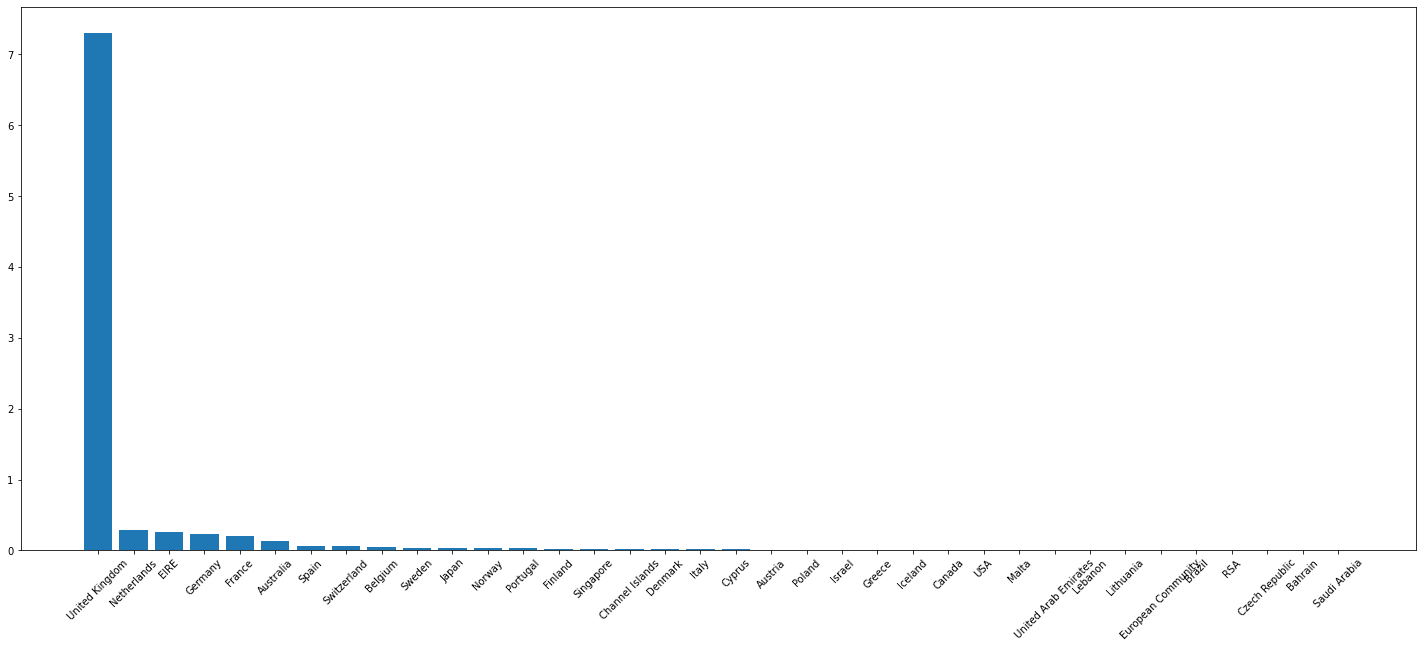

In [33]:
f1 = plt.figure(figsize=(25, 10))
f1 = plt.bar(data_Countries_Sales['Country'], data_Countries_Sales['totalPrice']/10**6)
plt.tick_params(axis='x', labelrotation = 45)

- Maximum Payment Customer is in which Country?

In [34]:
data[data['totalPrice'] == data['totalPrice'].max()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,totalPrice
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.6


#### since it is UK based, it's natural to get those resullts about UK, we may remove UK for better analysis.

In [35]:
data_Countries_Sales = data_Countries_Sales[1:]

In [36]:
data_Countries_Sales

,Country,Quantity,UnitPrice,totalPrice
1,Netherlands,200361,6247.73,285446.34
2,EIRE,140275,32179.28,265545.90
3,Germany,119261,33532.14,228867.14
4,France,111471,36832.04,209024.05
5,Australia,83901,3612.50,138521.31
6,Spain,27940,9504.34,61577.11
7,Switzerland,30082,6389.27,56443.95
8,Belgium,23237,7372.85,41196.34
9,Sweden,36083,1695.79,38378.33
10,Japan,26016,657.21,37416.37


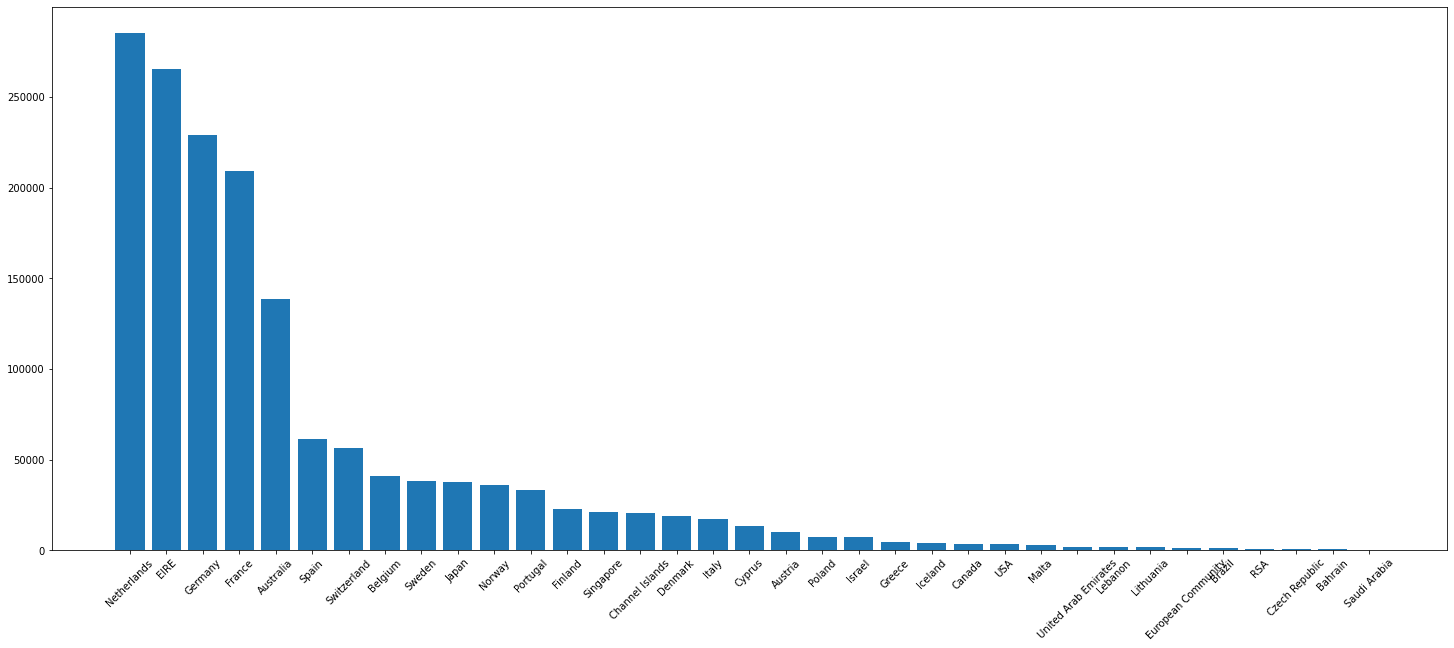

In [37]:
f1 = plt.figure(figsize=(25, 10))
f1 = plt.bar(data_Countries_Sales['Country'], data_Countries_Sales['totalPrice'])
plt.tick_params(axis='x', labelrotation = 45)

In [38]:
data.query('Country != "United Kingdom"').sort_values('totalPrice', ascending = False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,totalPrice
421601,573003,23084,RABBIT NIGHT LIGHT,2400,2011-10-27 12:11:00,2.08,14646,Netherlands,4992.00
422376,573080,M,Manual,1,2011-10-27 14:20:00,4161.06,12536,France,4161.06
422351,573077,M,Manual,1,2011-10-27 14:13:00,4161.06,12536,France,4161.06
406406,571751,M,Manual,1,2011-10-19 11:18:00,3949.32,12744,Singapore,3949.32
19871,537899,22328,ROUND SNACK BOXES SET OF 4 FRUITS,1488,2010-12-09 10:44:00,2.55,12755,Japan,3794.40
...,...,...,...,...,...,...,...,...,...
32274,539050,21986,PACK OF 12 PINK POLKADOT TISSUES,1,2010-12-15 16:21:00,0.29,12577,France,0.29
81834,543179,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,1,2011-02-04 10:31:00,0.29,12754,Japan,0.29
535259,581193,22755,SMALL PURPLE BABUSHKA NOTEBOOK,1,2011-12-07 17:05:00,0.21,17097,Spain,0.21
535261,581193,22754,SMALL RED BABUSHKA NOTEBOOK,1,2011-12-07 17:05:00,0.21,17097,Spain,0.21


- Most popular purchase

In [39]:
data['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1721
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1405
PARTY BUNTING                         1396
                                      ... 
PINK BAROQUE FLOCK CANDLE HOLDER         1
BREAD BIN, DINER STYLE, IVORY            1
FLOWER FAIRY 5 SUMMER DRAW LINERS        1
ENAMEL MUG PANTRY                        1
DIAMANTE NECKLACE                        1
Name: Description, Length: 3877, dtype: int64

Orders Timelines per year per country

In [40]:
data_dates_country = data.groupby(['Country', 'InvoiceDate']).sum()

In [41]:
data_dates_country.sort_values('totalPrice', ascending = False)

Quantity  UnitPrice  totalPrice
Country        InvoiceDate                                         
United Kingdom 2011-12-09 09:15:00     80995       2.08   168469.60
               2011-01-18 10:01:00     74215       1.04    77183.60
               2011-06-10 15:28:00        60     649.50    38970.00
               2011-09-20 11:05:00     12572      36.77    31698.16
Australia      2011-06-15 13:37:00     15241     286.96    23426.81
...                                      ...        ...         ...
United Kingdom 2010-12-13 16:18:00         1       0.95        0.95
               2011-01-23 13:33:00         1       0.85        0.85
               2011-01-12 12:41:00         1       0.85        0.85
               2011-01-31 15:37:00         1       0.55        0.55
               2011-10-11 11:02:00         1       0.38        0.38

[17484 rows x 3 columns]

let's see some time analysis

In [42]:
data_dates_country = data_dates_country.reset_index()

In [43]:
data_dates_country['Day'] = data_dates_country['InvoiceDate'].dt.date

In [47]:
data_dates_country

,Country,InvoiceDate,Quantity,UnitPrice,totalPrice,Day
0,Australia,2010-12-01 10:03:00,107,73.90,358.25,2010-12-01
1,Australia,2010-12-08 09:53:00,214,21.81,258.90,2010-12-08
2,Australia,2010-12-17 14:10:00,146,35.10,415.70,2010-12-17
3,Australia,2011-01-06 11:12:00,4662,86.08,7011.38,2011-01-06
4,Australia,2011-01-06 12:37:00,140,2.10,143.00,2011-01-06
...,...,...,...,...,...,...
17479,United Kingdom,2011-12-09 12:21:00,18,3.53,29.88,2011-12-09
17480,United Kingdom,2011-12-09 12:23:00,76,3.30,124.60,2011-12-09
17481,United Kingdom,2011-12-09 12:25:00,120,2.57,140.64,2011-12-09
17482,United Kingdom,2011-12-09 12:31:00,278,37.78,329.05,2011-12-09


In [48]:
data_dates_country['Country'].unique()

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada',
       'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE',
       'European Community', 'Finland', 'France', 'Germany', 'Greece',
       'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania',
       'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'RSA',
       'Saudi Arabia', 'Singapore', 'Spain', 'Sweden', 'Switzerland',
       'USA', 'United Arab Emirates', 'United Kingdom'], dtype=object)

In [49]:
countries = data_dates_country.Country.unique()

DataFrameDict = {elem : pd.DataFrame for elem in countries}

for key in DataFrameDict.keys():
    DataFrameDict[key] = data_dates_country[:][data_dates_country.Country == key]

In [50]:
countries

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada',
       'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE',
       'European Community', 'Finland', 'France', 'Germany', 'Greece',
       'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania',
       'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'RSA',
       'Saudi Arabia', 'Singapore', 'Spain', 'Sweden', 'Switzerland',
       'USA', 'United Arab Emirates', 'United Kingdom'], dtype=object)

In [51]:
for country in DataFrameDict:
    DataFrameDict[country] = DataFrameDict[country].groupby('Day').sum().reset_index().sort_values('Day').set_index('Day')

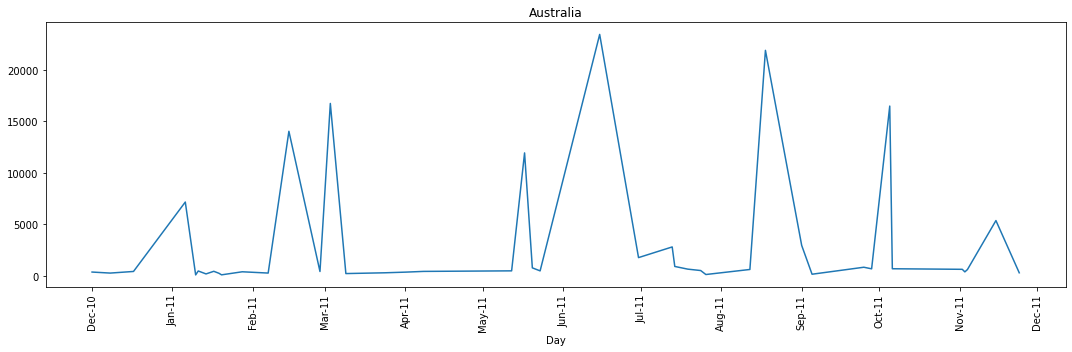

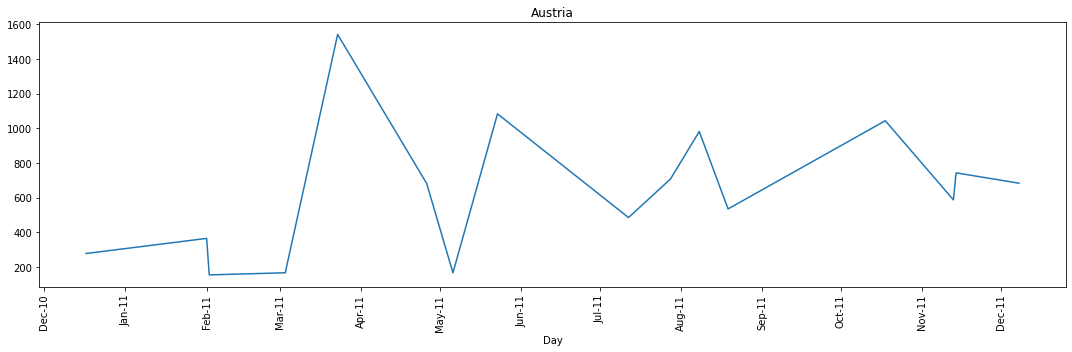

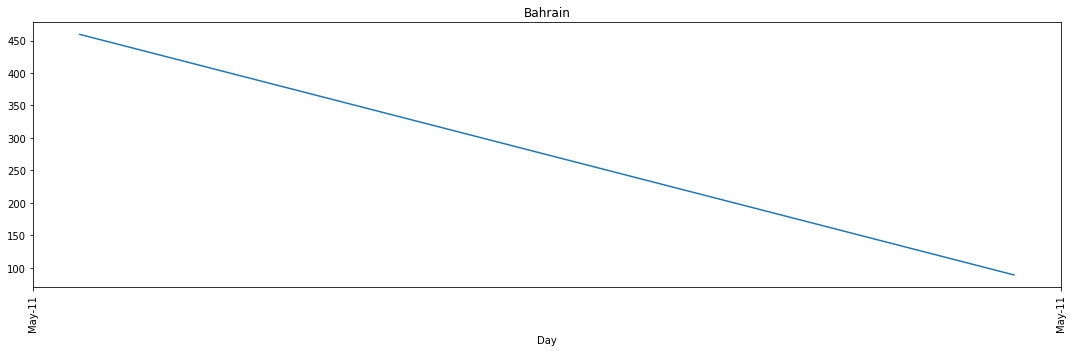

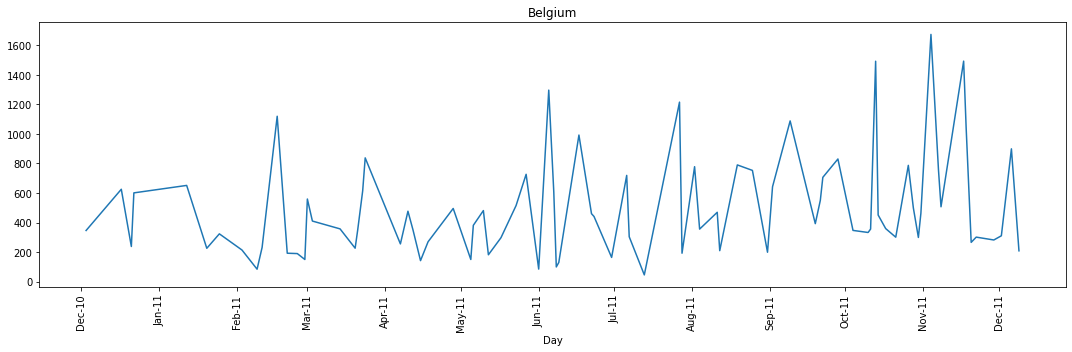

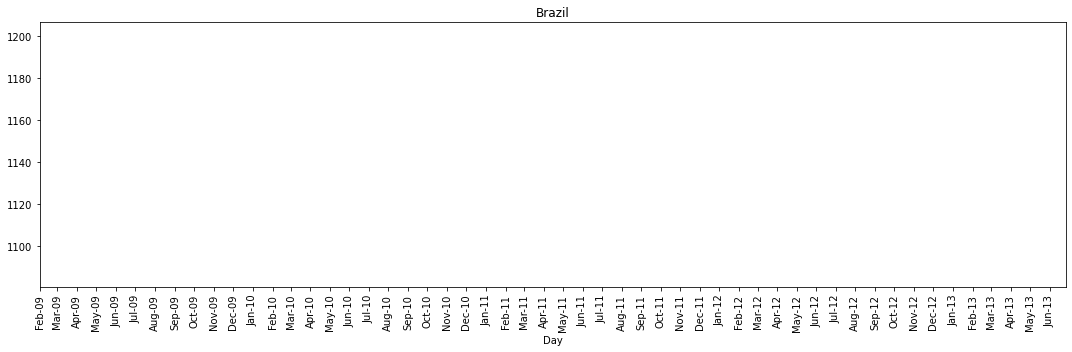

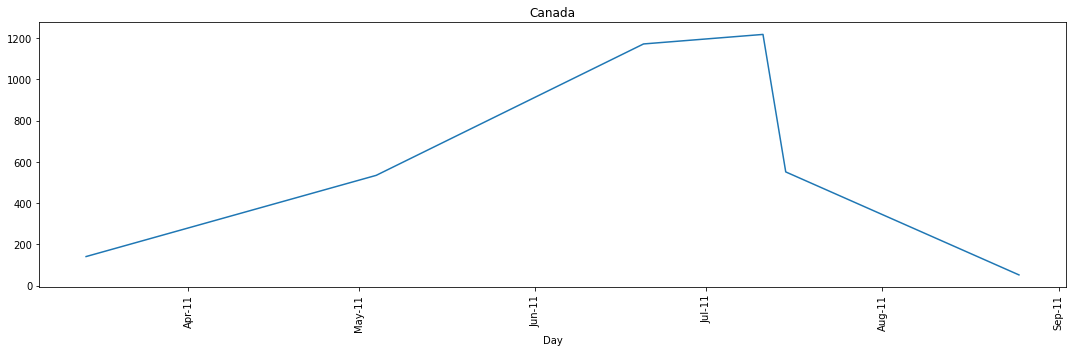

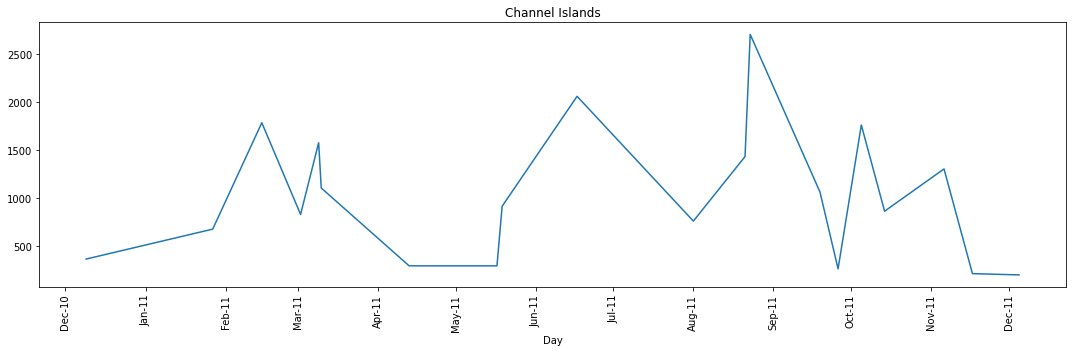

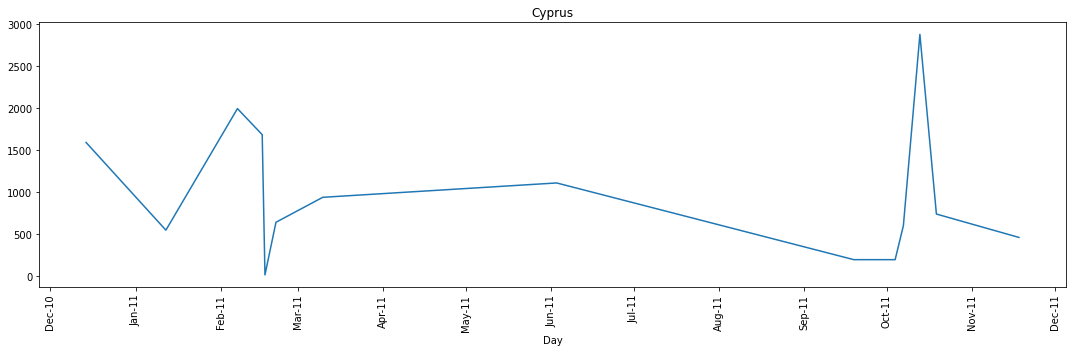

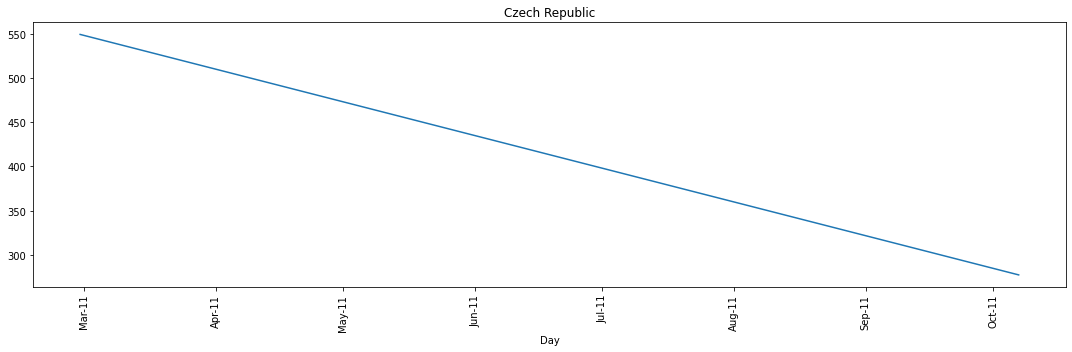

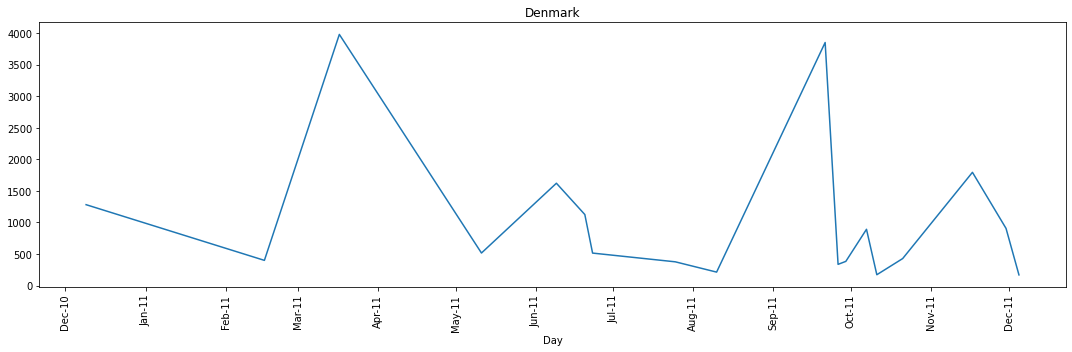

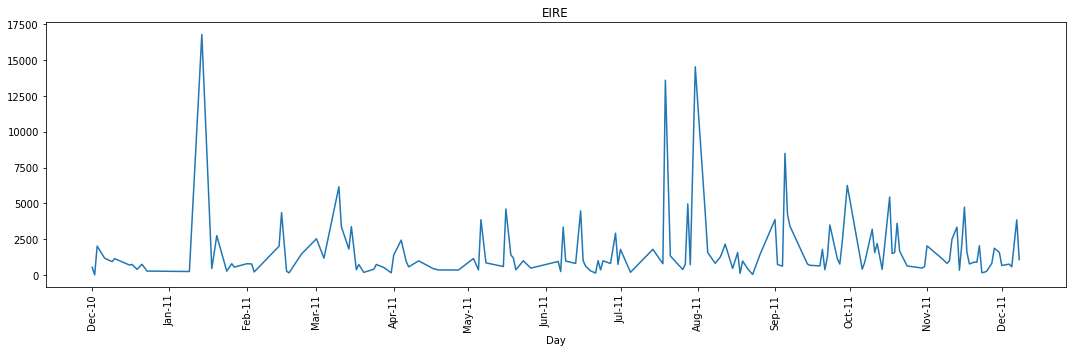

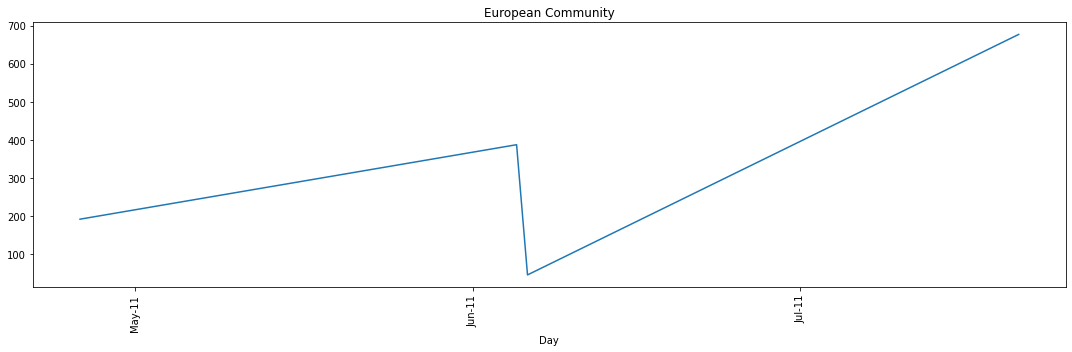

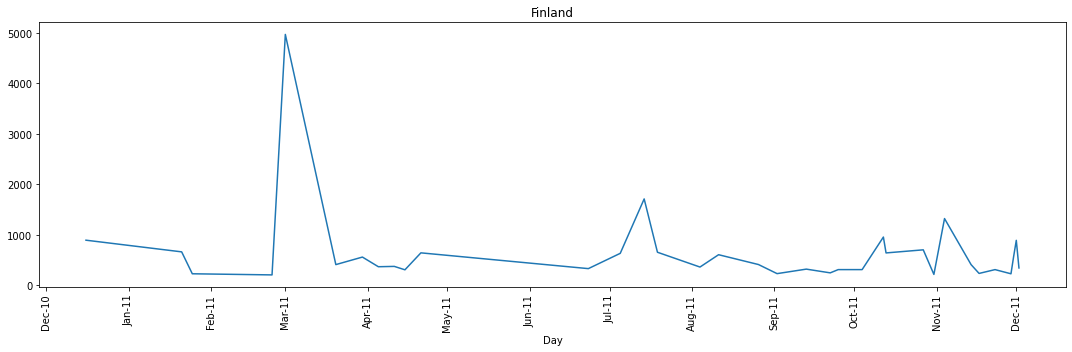

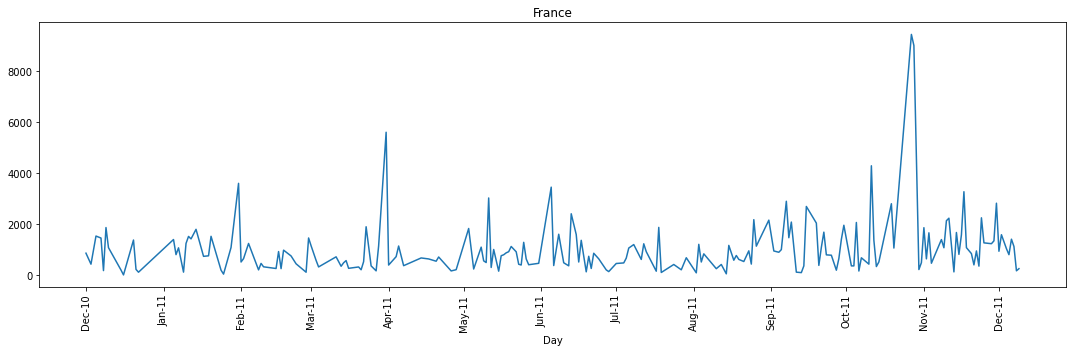

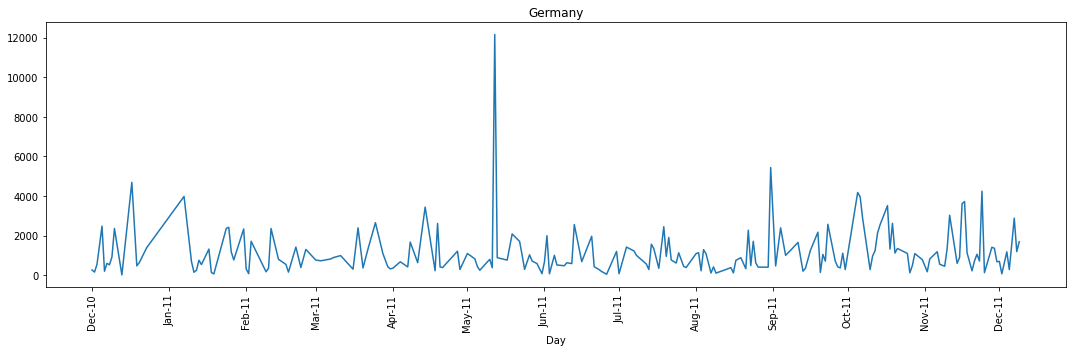

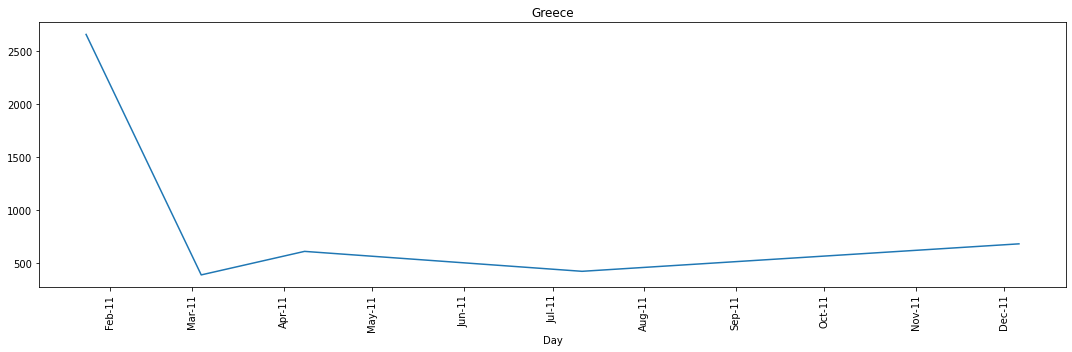

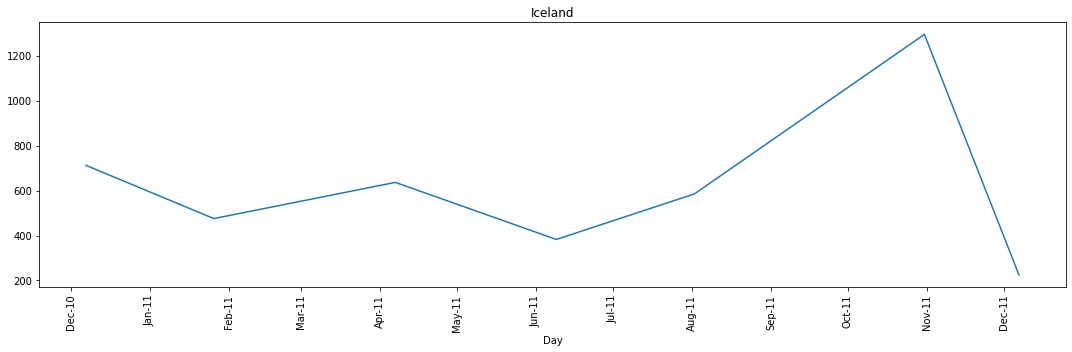

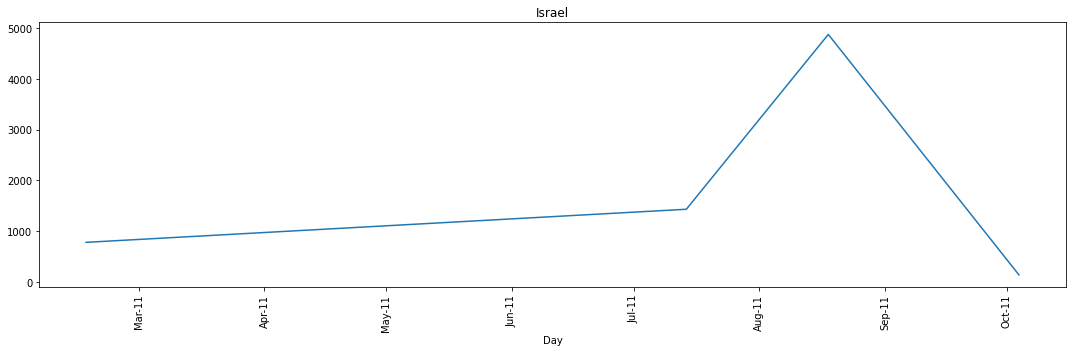

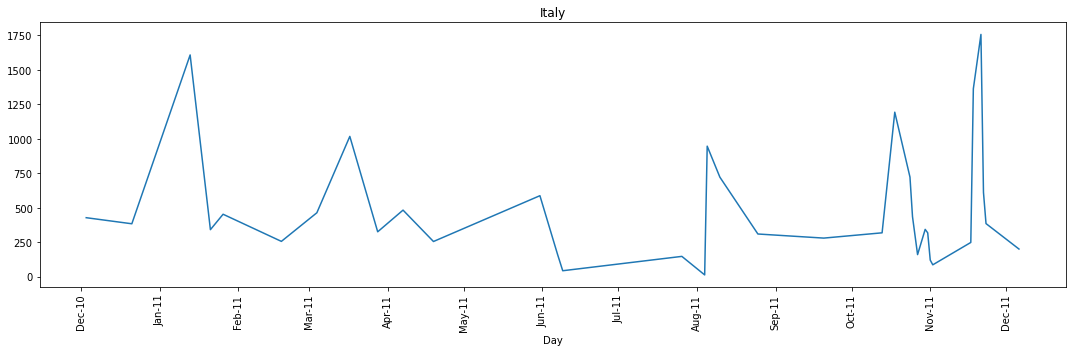

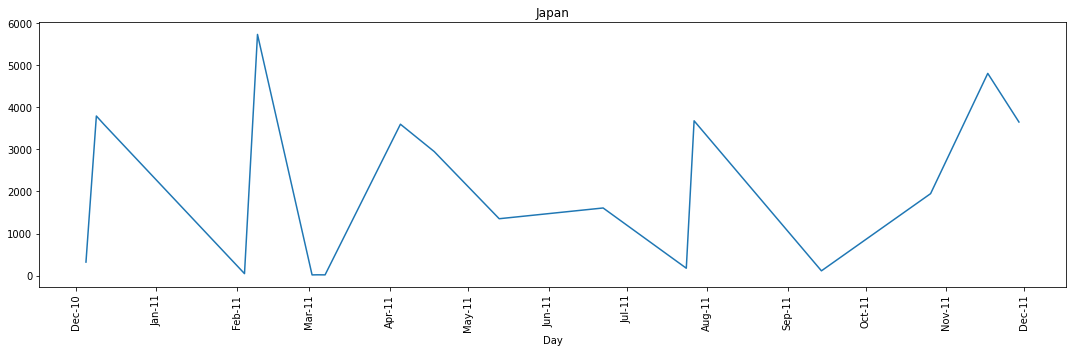

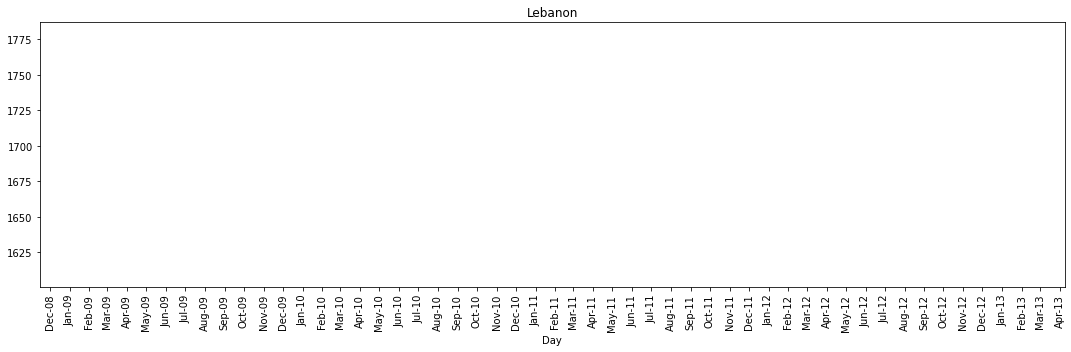

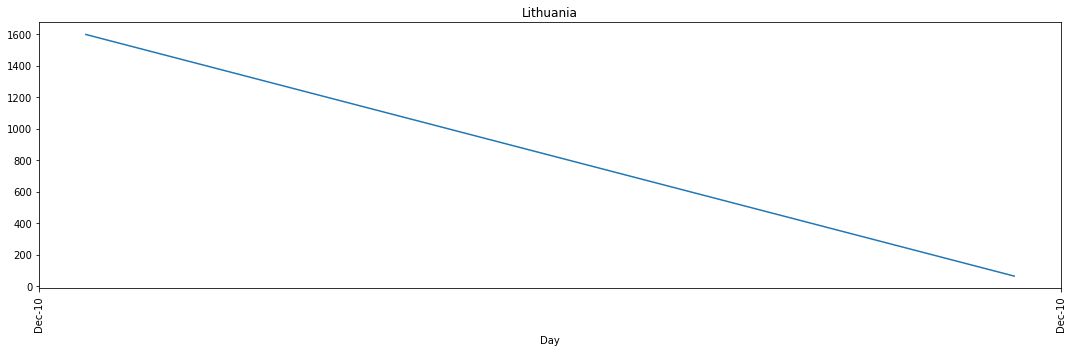

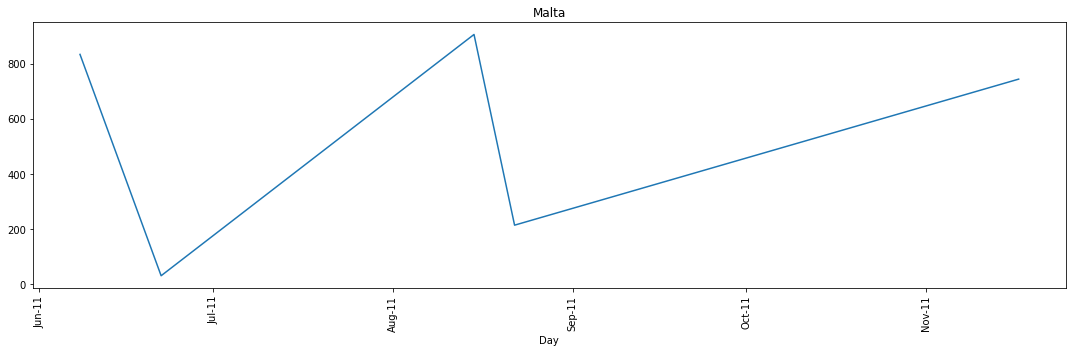

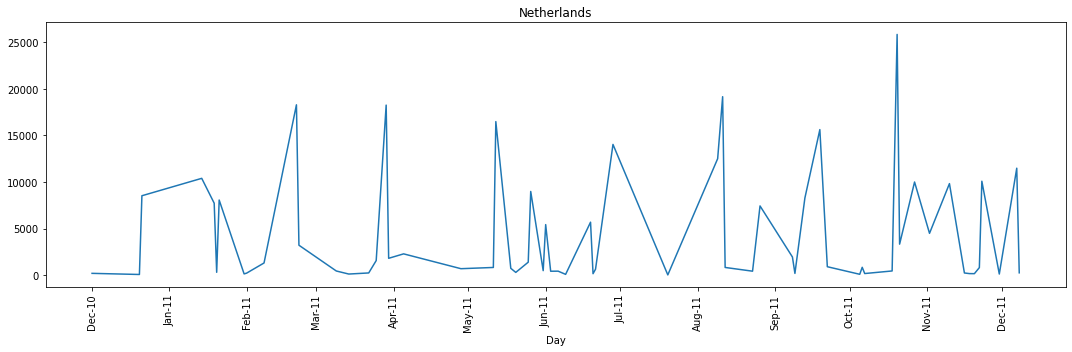

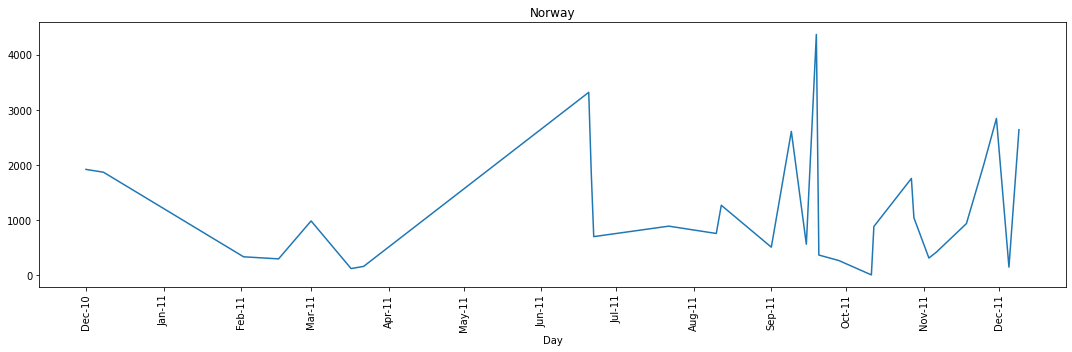

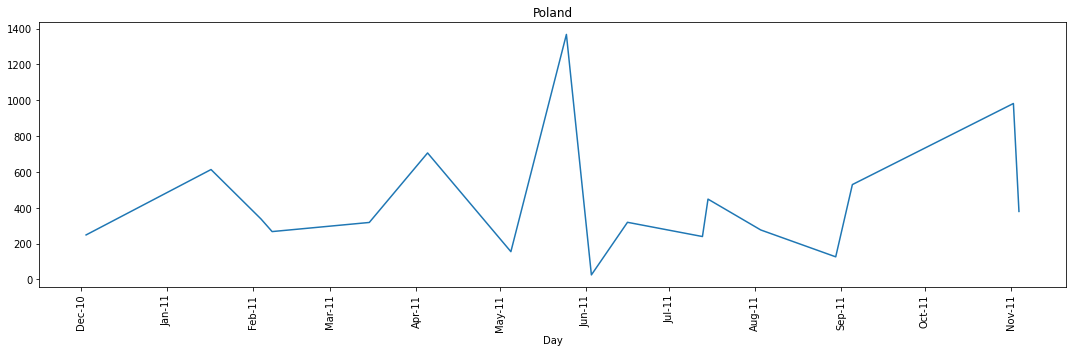

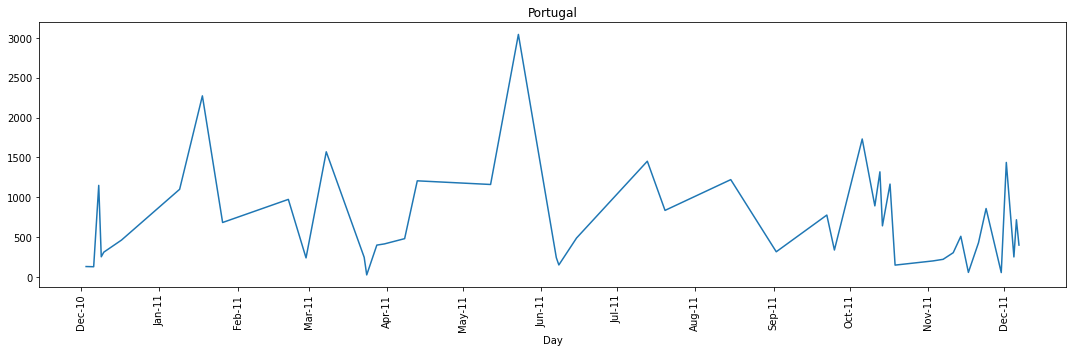

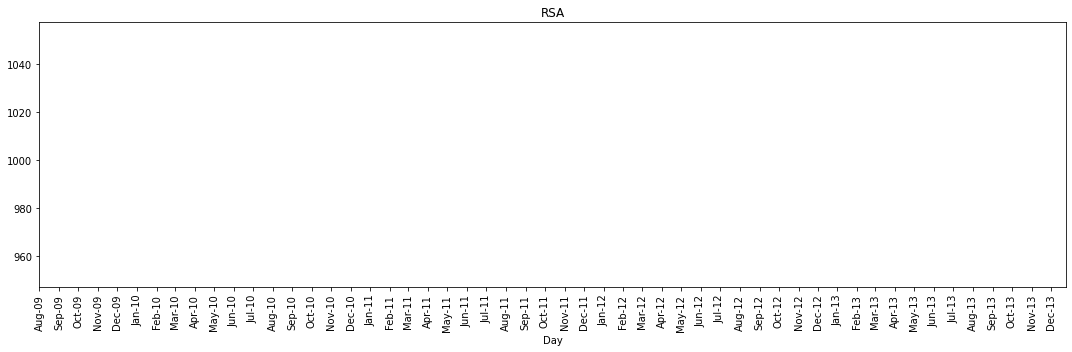

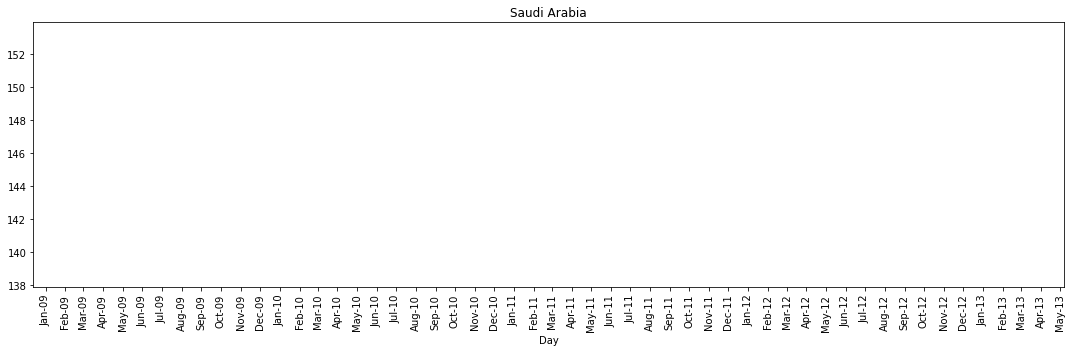

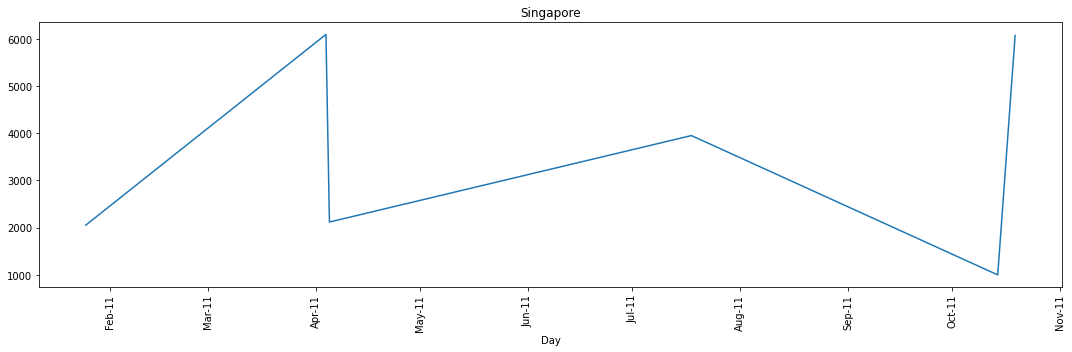

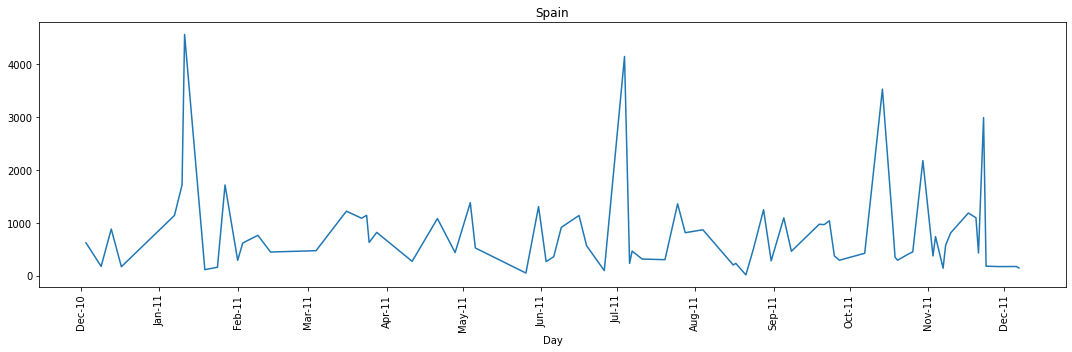

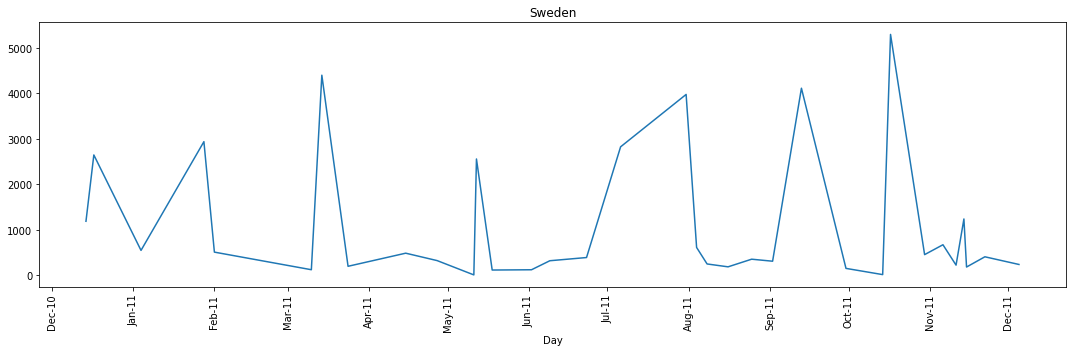

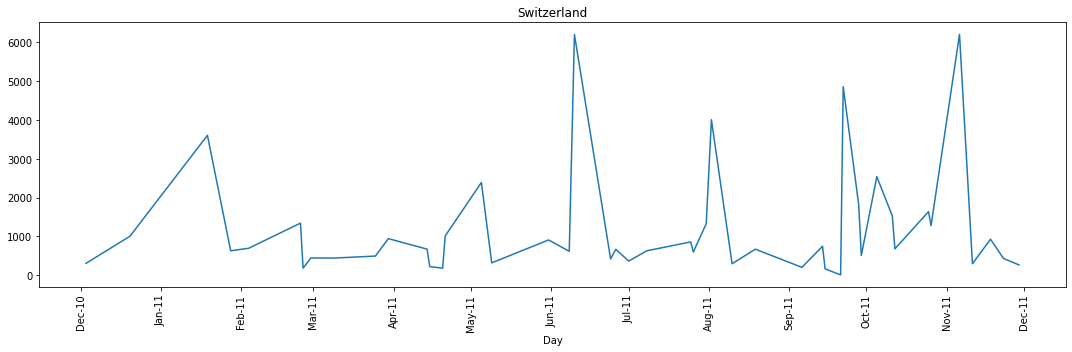

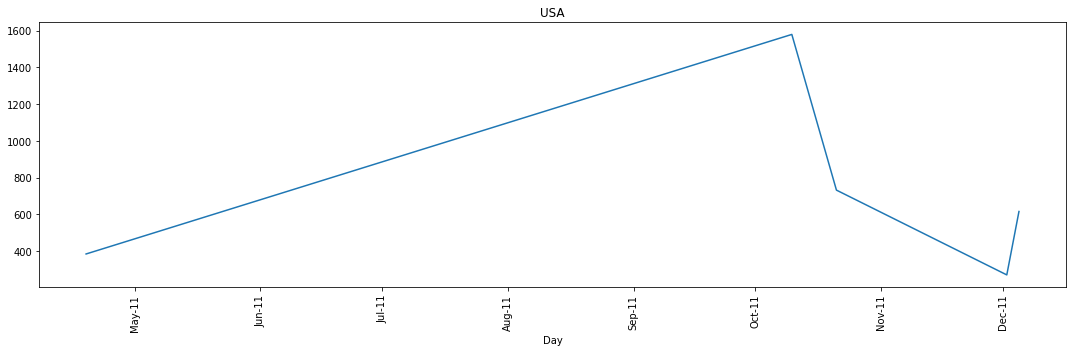

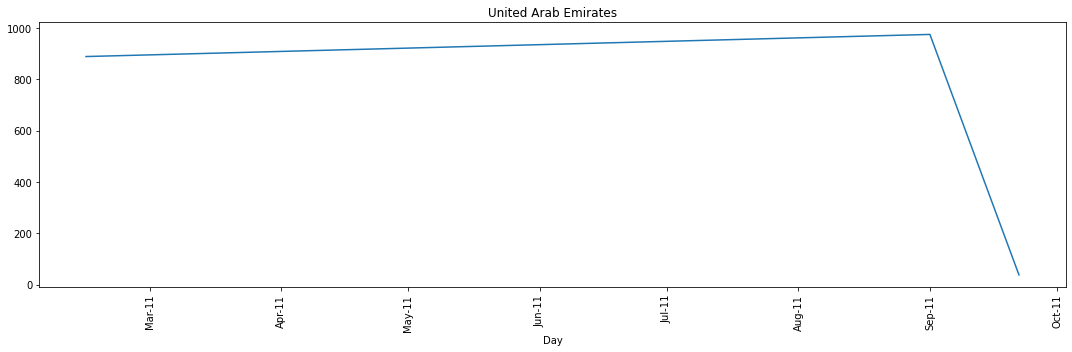

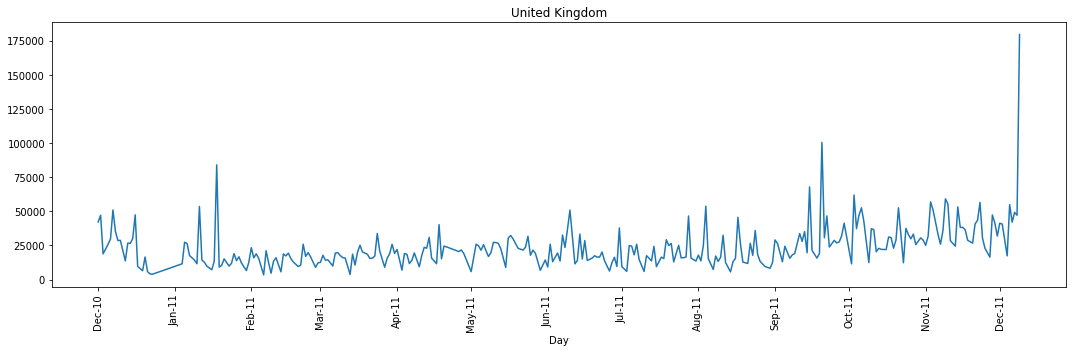

In [53]:
for country in DataFrameDict:
    ax = DataFrameDict[country]['totalPrice'].plot(figsize=(15,5))
    ax.set_title(country)
    #defines the tick location 
    ax.xaxis.set_major_locator(MonthLocator())
    #defines the label format
    ax.xaxis.set_major_formatter(DateFormatter("%b-%y"))
    ax.tick_params(axis="x", labelrotation= 90)
    plt.tight_layout()
    plt.show()

In [54]:
DataFrameDict['Brazil']

,Quantity,UnitPrice,totalPrice
Day,,,
2011-04-15,356,142.6,1143.6


In [55]:
DataFrameDict['Lebanon']

,Quantity,UnitPrice,totalPrice
Day,,,
2011-01-27,386,242.44,1693.88


In [56]:
DataFrameDict['RSA']

,Quantity,UnitPrice,totalPrice
Day,,,
2011-10-13,351,248.1,1002.31


In [57]:
DataFrameDict['Saudi Arabia']

,Quantity,UnitPrice,totalPrice
Day,,,
2011-02-24,80,21.16,145.92


Customers with highest purchases with their invoices

In [58]:
data_customers = data[['CustomerID', 'Country','InvoiceNo', 'Quantity', 'UnitPrice', 'totalPrice']]

In [59]:
data_customers = data_customers.query('Country != "United Kingdom"')

In [60]:
data_customers = data_customers.groupby(['InvoiceNo','CustomerID','Country']).sum().sort_values(['Quantity','totalPrice'], ascending = False).reset_index()

In [61]:
data_customers[:50]

,InvoiceNo,CustomerID,Country,Quantity,UnitPrice,totalPrice
0,556917,12415.0,Australia,15049,283.57,22775.93
1,563076,14646.0,Netherlands,14730,269.39,19150.66
2,572035,14646.0,Netherlands,13392,325.26,20277.92
3,552883,14646.0,Netherlands,12266,218.31,14415.74
4,563614,12415.0,Australia,12196,218.72,21880.44
5,548011,14646.0,Netherlands,11116,200.94,15719.56
6,545475,12415.0,Australia,10272,257.77,16726.84
7,558262,14646.0,Netherlands,8998,132.80,10174.94
8,543989,12415.0,Australia,8384,191.73,14022.92
9,553546,12415.0,Australia,8268,197.25,11924.80


In [62]:
data_customers['Quantity'].max(),data_customers['Quantity'].min()

(15049, 1)

The highest invoice is in Australia with customer ID 12415

The Pricest Unit Price:

In [66]:
data_customers.sort_values('UnitPrice', ascending = False)[:50]

,InvoiceNo,CustomerID,Country,Quantity,UnitPrice,totalPrice
1823,571751,12744.0,Singapore,2,6068.06,6068.06
1836,573077,12536.0,France,1,4161.06,4161.06
1837,573080,12536.0,France,1,4161.06,4161.06
1800,548813,12744.0,Singapore,4,4037.77,4037.77
1838,548820,12744.0,Singapore,1,2053.07,2053.07
1840,546329,14911.0,EIRE,1,1687.17,1687.17
1839,546328,14911.0,EIRE,1,1687.17,1687.17
1842,554301,12757.0,Portugal,1,1241.98,1241.98
1841,554155,12757.0,Portugal,1,1241.98,1241.98
1843,548913,12669.0,France,1,1136.30,1136.30


#### Singapore and France are taking the first places for the most expensive Unit Prices